In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import boxcox
#from matplotlib.mlab import PCA as mlabPCA #somehow im not getting it to work..
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings


warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)



# no need for an open connection, 
# as we're only doing a single query
engine.dispose() # data set loaded


In [26]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [ ]:
# GOAL : find factors that affect life expectancy
# find which increase expected life in countries 
# + which factors decrease it

There are 0 missing values for Life Expectancy
There are 0 missing values for Percentage Expenditure
Correlation Coefficient between Life Expectancy and Percentage Expenditure is 0.388727


Text(0.5, 1.0, 'Relationship of Life Expectancy and Percentage Expenditure')

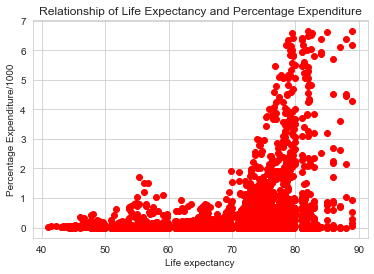

In [15]:
#POS CORREL: #LIFE EXPECTANCY AND PERCENTAGE EXPENDITURE

#only keeping rows in df that ARE NOT the outliers
#wanna take out the outliers bc they might skew the average

#df_1 is df without rows that have "lower outliers" from df['Life expectancy ']
df_1 = df[(df['Life expectancy '] >= ((df['Life expectancy '].mean()) - (df['Life expectancy '].std())*3))]
#df_2 is df without rows that have "upper outliers" from df['Life expectancy ']
df_2 = df_1[df_1['Life expectancy '] <= (df_1['Life expectancy '].mean()) + (df_1['Life expectancy '].std())*3]
#df_3 is df without rows that have "lower outliers" from df['percentage expenditure']
df_3 = df_2[(df_2['percentage expenditure'] >= ((df_2['percentage expenditure'].mean()) - (df_2['percentage expenditure'].std())*3))]
#df_4 is df without rows that have "upper outliers" from df['percentage expenditure']
df_4 = df_3[df_3['percentage expenditure'] <= (df_3['percentage expenditure'].mean()) + (df_3['percentage expenditure'].std())*3]


#check missing at random values
df_4_life_expectancy = df_4['Life expectancy '].isnull().sum()
df_4_percentage_expenditure = df_4['percentage expenditure'].isnull().sum()
print('There are %d missing values for Life Expectancy' % df_4_life_expectancy)
print('There are %d missing values for Percentage Expenditure' % df_4_percentage_expenditure)


#fillna for empty rows in columns with median
#df_4['Life expectancy '].fillna(df_4['Life expectancy '].median())
#df_4['percentage expenditure'].fillna(df_4['percentage expenditure'].median())

#Check correlation between the variables:
LifeExpectancy_PercentExpenditure_Corr = df_4['Life expectancy '].corr(df_4['percentage expenditure'])
print('Correlation Coefficient between Life Expectancy and Percentage Expenditure is %f' % LifeExpectancy_PercentExpenditure_Corr )


#PLOT
plt.scatter(x=df_4['Life expectancy '], y=df_4['percentage expenditure']/1000, color = 'red')
plt.xlabel('Life expectancy')
plt.ylabel('Percentage Expenditure/1000')
plt.title('Relationship of Life Expectancy and Percentage Expenditure')
# in countries with high life expectancy, there is jump in percentage expenditure

There are 0 missing values for Life Expectancy
There are 0 missing values for HIV/AIDS
Correlation Coefficient between Life Expectancy and HIV/AIDS is -0.627411


Text(0.5, 1.0, 'Relationship of Life Expectancy and HIV/AIDS')

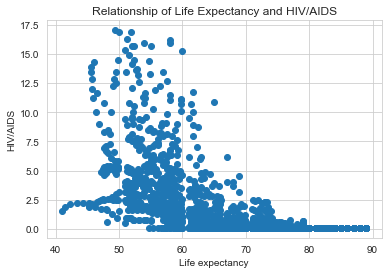

In [16]:
#LIFE EXPECTANCY AND HIV/AIDS

#only keeping rows in df that ARE NOT the outliers
#wanna take out the outliers bc they might skew the average

#df_1 is df without rows that have "lower outliers" from df['Life expectancy ']
df_1 = df[(df['Life expectancy '] >= ((df['Life expectancy '].mean()) - (df['Life expectancy '].std())*3))]
#df_2 is df without rows that have "upper outliers" from df['Life expectancy ']
df_2 = df_1[df_1['Life expectancy '] <= (df_1['Life expectancy '].mean()) + (df_1['Life expectancy '].std())*3]

#df_3 is df without rows that have "lower outliers" from df[' HIV/AIDS']
df_3 = df_2[(df_2[' HIV/AIDS'] >= ((df_2[' HIV/AIDS'].mean()) - (df_2[' HIV/AIDS'].std())*3))]
#df_4 is df without rows that have "upper outliers" from df[' HIV/AIDS']
df_4 = df_3[df_3[' HIV/AIDS'] <= (df_3[' HIV/AIDS'].mean()) + (df_3[' HIV/AIDS'].std())*3]


#check missing at random values
df_4_life_expectancy = df_4['Life expectancy '].isnull().sum()
df_4_HIVAIDS = df_4[' HIV/AIDS'].isnull().sum()
print('There are %d missing values for Life Expectancy' % df_4_life_expectancy)
print('There are %d missing values for HIV/AIDS' % df_4_HIVAIDS)


#fillna for empty rows in columns with median
#df_4['Life expectancy '].fillna(df_4['Life expectancy '].median())
#df_4[' HIV/AIDS'].fillna(df_4[' HIV/AIDS'].median())

#Check correlation between the variables:
LifeExpectancy_HIVAIDS_Corr = df_4['Life expectancy '].corr(df_4[' HIV/AIDS'])
print('Correlation Coefficient between Life Expectancy and HIV/AIDS is %f' % LifeExpectancy_HIVAIDS_Corr )


#PLOT
plt.scatter(x=df_4['Life expectancy '], y=df_4[' HIV/AIDS'])
plt.xlabel('Life expectancy')
plt.ylabel('HIV/AIDS')
plt.title('Relationship of Life Expectancy and HIV/AIDS')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

Text(0.5, 1.0, 'Relationship of Life Expectancy and Alcohol')

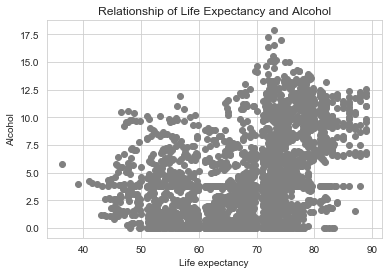

In [77]:
df['Alcohol'].fillna(df['Alcohol'].median(), inplace=True)
plt.scatter(x=df['Life expectancy '], y=df['Alcohol'], color = 'gray')
plt.xlabel('Life expectancy')
plt.ylabel('Alcohol')
plt.title('Relationship of Life Expectancy and Alcohol')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

# NO RELATIONSHIP

There are 0 missing values for Life Expectancy
There are 0 missing values for HIV/AIDS
Correlation Coefficient between Life Expectancy and GDP is 0.470815


Text(0.5, 1.0, 'Relationship of Life Expectancy and GDP')

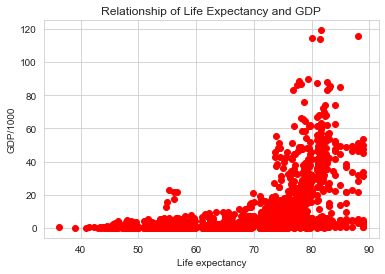

In [17]:
#LIFE EXPECTANCY AND GDP

#only keeping rows in df that ARE NOT the outliers
#wanna take out the outliers bc they might skew the average

#df_1 is df without rows that have "lower outliers" from df['Life expectancy ']
df_1 = df[(df['Life expectancy '] >= ((df['Life expectancy '].mean()) - (df['Life expectancy '].std())*3))]
#df_2 is df without rows that have "upper outliers" from df['Life expectancy ']
df_2 = df_1[df_1['Life expectancy '] <= (df_1['Life expectancy '].mean()) + (df_1['Life expectancy '].std())*3]

#df_3 is df without rows that have "lower outliers" from df['GDP']
df_3 = df_2[(df_2['GDP'] >= ((df_2['GDP'].mean()) - (df_2['GDP'].std())*3))]
#df_4 is df without rows that have "upper outliers" from df['GDP']
df_4 = df_3[df_3['GDP'] <= (df_3['GDP'].mean()) + (df_3['GDP'].std())*3]


#check missing at random values
df_4_life_expectancy = df_4['Life expectancy '].isnull().sum()
df_4_GDP = df_4['GDP'].isnull().sum()
print('There are %d missing values for Life Expectancy' % df_4_life_expectancy)
print('There are %d missing values for HIV/AIDS' % df_4_GDP)

#fillna for empty rows in columns with median
#df_4['Life expectancy '].fillna(df_4['Life expectancy '].median())
#df_4['GDP'].fillna(df_4['GDP'].median())


#Check correlation between the variables:
LifeExpectancy_GDP_Corr = df_4['Life expectancy '].corr(df_4['GDP'])
print('Correlation Coefficient between Life Expectancy and GDP is %f' % LifeExpectancy_GDP_Corr )


#PLOT
plt.scatter(x=df['Life expectancy '], y=df['GDP']/1000, color = 'red')
plt.xlabel('Life expectancy')
plt.ylabel('GDP/1000')
plt.title('Relationship of Life Expectancy and GDP')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

There are 0 missing values for Life Expectancy
There are 0 missing values for Schooling
Correlation Coefficient between Life Expectancy and Schooling is 0.783952


Text(0.5, 1.0, 'Relationship of Life Expectancy and Schooling')

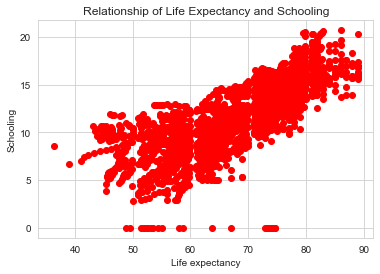

In [20]:
#LIFE EXPECTANCY AND SCHOOLING

#only keeping rows in df that ARE NOT the outliers
#wanna take out the outliers bc they might skew the average

#df_1 is df without rows that have "lower outliers" from df['Life expectancy ']
df_1 = df[(df['Life expectancy '] >= ((df['Life expectancy '].mean()) - (df['Life expectancy '].std())*3))]
#df_2 is df without rows that have "upper outliers" from df['Life expectancy ']
df_2 = df_1[df_1['Life expectancy '] <= (df_1['Life expectancy '].mean()) + (df_1['Life expectancy '].std())*3]

#df_3 is df without rows that have "lower outliers" from df['Schooling']
df_3 = df_2[(df_2['Schooling'] >= ((df_2['Schooling'].mean()) - (df_2['Schooling'].std())*3))]
#df_4 is df without rows that have "upper outliers" from df['Schooling']
df_4 = df_3[df_3['Schooling'] <= (df_3['Schooling'].mean()) + (df_3['Schooling'].std())*3]



#check missing at random values
df_4_life_expectancy = df_4['Life expectancy '].isnull().sum()
df_4_Schooling = df_4['Schooling'].isnull().sum()
print('There are %d missing values for Life Expectancy' % df_4_life_expectancy)
print('There are %d missing values for Schooling' % df_4_Schooling)

#fillna for empty rows in columns with median
#df_4['Life expectancy '].fillna(df_4['Life expectancy '].median())
#df_4['Schooling'].fillna(df_4['Schooling'].median())


#Check correlation between the variables:
LifeExpectancy_Schooling_Corr = df_4['Life expectancy '].corr(df_4['Schooling'])
print('Correlation Coefficient between Life Expectancy and Schooling is %f' % LifeExpectancy_Schooling_Corr )

#Save this variable for Checking Correlation
df_4_Schooling = df_4['Schooling']

#PLOT
plt.scatter(x=df['Life expectancy '], y=df['Schooling'], color = 'red')
plt.xlabel('Life expectancy')
plt.ylabel('Schooling')
plt.title('Relationship of Life Expectancy and Schooling')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

There are 0 missing values for Life Expectancy
There are 0 missing values for Income Composition of Resources
Correlation Coefficient between Life Expectancy and Income composition of resources is 0.725382


Text(0.5, 1.0, 'Relationship of Life Expectancy and Income Composition of Resources')

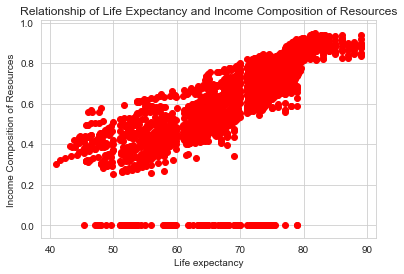

In [28]:
#POS CORREL: LIFE EXPECTANCY AND INCOME COMPOSITION OF RESOURCES

#only keeping rows in df that ARE NOT the outliers
#wanna take out the outliers bc they might skew the average

#df_1 is df without rows that have "lower outliers" from df['Life expectancy ']
df_1 = df[(df['Life expectancy '] >= ((df['Life expectancy '].mean()) - (df['Life expectancy '].std())*3))]
#df_2 is df without rows that have "upper outliers" from df['Life expectancy ']
df_2 = df_1[df_1['Life expectancy '] <= (df_1['Life expectancy '].mean()) + (df_1['Life expectancy '].std())*3]

#df_3 is df without rows that have "lower outliers" from df['Income composition of resources']
df_3 = df_2[(df_2['Income composition of resources'] >= ((df_2['Income composition of resources'].mean()) - (df_2['Income composition of resources'].std())*3))]
#df_4 is df without rows that have "upper outliers" from df['Income composition of resources']
df_4 = df_3[df_3['Income composition of resources'] <= (df_3['Income composition of resources'].mean()) + (df_3['Income composition of resources'].std())*3]


#check missing at random values
df_4_life_expectancy = df_4['Life expectancy '].isnull().sum()
df_4_IncomeCompositionOfResources = df_4['Income composition of resources'].isnull().sum()
print('There are %d missing values for Life Expectancy' % df_4_life_expectancy)
print('There are %d missing values for Income Composition of Resources' % df_4_IncomeCompositionOfResources)

#fillna for empty rows in columns with median
#df_4['Life expectancy '].fillna(df_4['Life expectancy '].median())
#df_4['Income composition of resources'].fillna(df_4['Income composition of resources'].median())


#Check correlation between the variables:
LifeExpectancy_IncomeCompositionofResources_Corr = df_4['Life expectancy '].corr(df_4['Income composition of resources'])
print('Correlation Coefficient between Life Expectancy and Income composition of resources is %f' % LifeExpectancy_IncomeCompositionofResources_Corr )


#PLOT
plt.scatter(x=df_4['Life expectancy '], y=df_4['Income composition of resources'], color = 'red')
plt.xlabel('Life expectancy')
plt.ylabel('Income Composition of Resources')
plt.title('Relationship of Life Expectancy and Income Composition of Resources')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

Text(0.5, 1.0, 'Relationship of Life Expectancy and Thinness (1-19 years)')

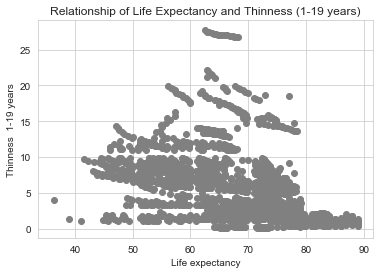

In [71]:
#NO RELATIONSHIP

df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].median(), inplace=True)
plt.scatter(x=df['Life expectancy '], y=df[' thinness  1-19 years'], color = 'gray')
plt.xlabel('Life expectancy')
plt.ylabel('Thinness  1-19 years')
plt.title('Relationship of Life Expectancy and Thinness (1-19 years)')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

Text(0.5, 1.0, 'Relationship of Life Expectancy and Diphtheria')

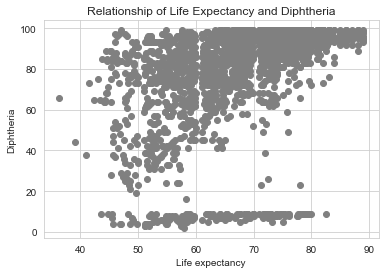

In [72]:
# NO RELATIONSHIP
df['Diphtheria '].fillna(df['Diphtheria '].median(), inplace=True)
plt.scatter(x=df['Life expectancy '], y=df['Diphtheria '], color = 'gray')
plt.xlabel('Life expectancy')
plt.ylabel('Diphtheria')
plt.title('Relationship of Life Expectancy and Diphtheria')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

Text(0, 0.5, 'Polio')

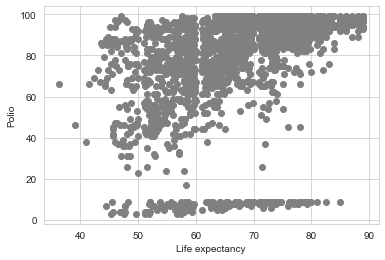

In [74]:
#NO RELATIONSHIP

df['Polio'].fillna(df['Polio'].median(), inplace=True)
plt.scatter(x=df['Life expectancy '], y=df['Polio'], color = 'gray')
plt.xlabel('Life expectancy')
plt.ylabel('Polio')
#plt.title('Relationship of Life Expectancy and Polio')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

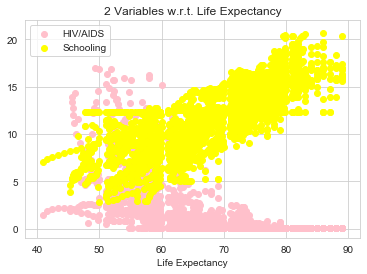

In [47]:
# Overlay HIV/AIDS and SCHOOLING on LIFE EXPECTANCY in X axis


#only keeping rows in df that ARE NOT the outliers
#wanna take out the outliers bc they might skew the average

#df_1 is df without rows that have "lower outliers" from df['Life expectancy ']
df_1 = df[(df['Life expectancy '] >= ((df['Life expectancy '].mean()) - (df['Life expectancy '].std())*3))]
#df_2 is df without rows that have "upper outliers" from df['Life expectancy ']
df_2 = df_1[df_1['Life expectancy '] <= (df_1['Life expectancy '].mean()) + (df_1['Life expectancy '].std())*3]

#df_3 is df without rows that have "lower outliers" from df['Schooling']
df_3 = df_2[(df_2['Schooling'] >= ((df_2['Schooling'].mean()) - (df_2['Schooling'].std())*3))]
#df_4 is df without rows that have "upper outliers" from df['Schooling']
df_4 = df_3[df_3['Schooling'] <= (df_3['Schooling'].mean()) + (df_3['Schooling'].std())*3]


#df_5 is df without rows that have "lower outliers" from df[' HIV/AIDS']
df_5 = df_4[(df_4[' HIV/AIDS'] >= ((df_4[' HIV/AIDS'].mean()) - (df_4[' HIV/AIDS'].std())*3))]
#df_6 is df without rows that have "upper outliers" from df[' HIV/AIDS']
df_6 = df_5[df_5[' HIV/AIDS'] <= (df_5[' HIV/AIDS'].mean()) + (df_5[' HIV/AIDS'].std())*3]


#fillna for empty rows in columns with median

df_6['Life expectancy '].fillna(df_6['Life expectancy '].median())
df_6['Schooling'].fillna(df_6['Schooling'].median())

#PLOT

y_1=df_6[' HIV/AIDS']
y_2=df_6['Schooling']


plt.scatter(x=df_6['Life expectancy '], y=y_1, color='pink', label = 'HIV/AIDS')
plt.scatter(x=df_6['Life expectancy '], y=y_2, color='yellow', label = 'Schooling' ) 
plt.xlabel('Life Expectancy')
plt.legend()
plt.title('2 Variables w.r.t. Life Expectancy')

plt.show() 

In [48]:
from scipy.stats.mstats import winsorize

In [49]:
df = pd.concat([df, pd.get_dummies(df["Country"])], axis=1) # Country recoded into numbers
df = pd.concat([df, pd.get_dummies(df["Status"])], axis=1) # Status recoded into numbers

In [50]:
# use winsorize as function to put all variables according to the same scale

In [51]:
#handle the blanks
df["Year"].fillna(df["Year"].median(), inplace=True)
df["Life expectancy "].fillna(df["Life expectancy "].median(), inplace=True)
df["Adult Mortality"].fillna(df["Adult Mortality"].median(), inplace=True)
df["infant deaths"].fillna(df["infant deaths"].median(), inplace=True)

df["Alcohol"].fillna(df["Alcohol"].median(), inplace=True)
df["percentage expenditure"].fillna(df["percentage expenditure"].median(), inplace=True)
df["Hepatitis B"].fillna(df["Hepatitis B"].median(), inplace=True)
df[" BMI "].fillna(df[" BMI "].median(), inplace=True)

df["under-five deaths "].fillna(df["under-five deaths "].median(), inplace=True)
df["Polio"].fillna(df["Polio"].median(), inplace=True)
df["Total expenditure"].fillna(df["Total expenditure"].median(), inplace=True)
df["Diphtheria "].fillna(df["Diphtheria "].median(), inplace=True)

df[" HIV/AIDS"].fillna(df[" HIV/AIDS"].median(), inplace=True)
df["GDP"].fillna(df["GDP"].median(), inplace=True)
df["Population"].fillna(df["Population"].median(), inplace=True)
df[" thinness  1-19 years"].fillna(df[" thinness  1-19 years"].median(), inplace=True)

df[" thinness 5-9 years"].fillna(df[" thinness 5-9 years"].median(), inplace=True)
df["Income composition of resources"].fillna(df["Income composition of resources"].median(), inplace=True)
#df["Population"].fillna(df["Population"].median(), inplace=True)
df["Schooling"].fillna(df["Schooling"].median(), inplace=True)

In [52]:
# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 

df["winsorized_Year"] = winsorized_views = winsorize(df["Year"], (0, 0.10))
df["winsorized_Life expectancy "] = winsorized_views = winsorize(df["Life expectancy "], (0, 0.10))
df["winsorized_Adult Mortality"] = winsorized_views = winsorize(df["Adult Mortality"], (0, 0.10))
df["winsorized_infant deaths"] = winsorized_views = winsorize(df["infant deaths"], (0, 0.10))

df["winsorized_Alcohol"] = winsorized_views = winsorize(df["Alcohol"], (0, 0.10))
df["winsorized_percentage expenditure"] = winsorized_views = winsorize(df["percentage expenditure"], (0, 0.10))
df["winsorized_Hepatitis B"] = winsorized_views = winsorize(df["Hepatitis B"], (0, 0.10))
df["winsorized_BMI"] = winsorized_views = winsorize(df[" BMI "], (0, 0.10))

df["winsorized_under-five deaths "] = winsorized_views = winsorize(df["under-five deaths "], (0, 0.10))
df["winsorized_Polio"] = winsorized_views = winsorize(df["Polio"], (0, 0.10))
df["winsorized_Total expenditure"] = winsorized_views = winsorize(df["Total expenditure"], (0, 0.10))
df["winsorized_Diphtheria "] = winsorized_views = winsorize(df["Diphtheria "], (0, 0.10))

df["winsorized_ HIV/AIDS "] = winsorized_views = winsorize(df[" HIV/AIDS"], (0, 0.10))
df["winsorized_GDP"] = winsorized_views = winsorize(df["GDP"], (0, 0.10))
df["winsorized_Population"] = winsorized_views = winsorize(df["Population"], (0, 0.10))
df["winsorized_ thinness  1-19 years"] = winsorized_views = winsorize(df[" thinness  1-19 years"], (0, 0.10))

df["winsorized_ thinness 5-9 years"] = winsorized_views = winsorize(df[" thinness 5-9 years"], (0, 0.10))
df["winsorized_Income composition of resources"] = winsorized_views = winsorize(df["Income composition of resources"], (0, 0.10))
#df["winsorized_Population"] = winsorized_views = winsorize(df["Population"], (0, 0.10))
df["winsorized_Schooling"] = winsorized_views = winsorize(df["Schooling"], (0, 0.10))

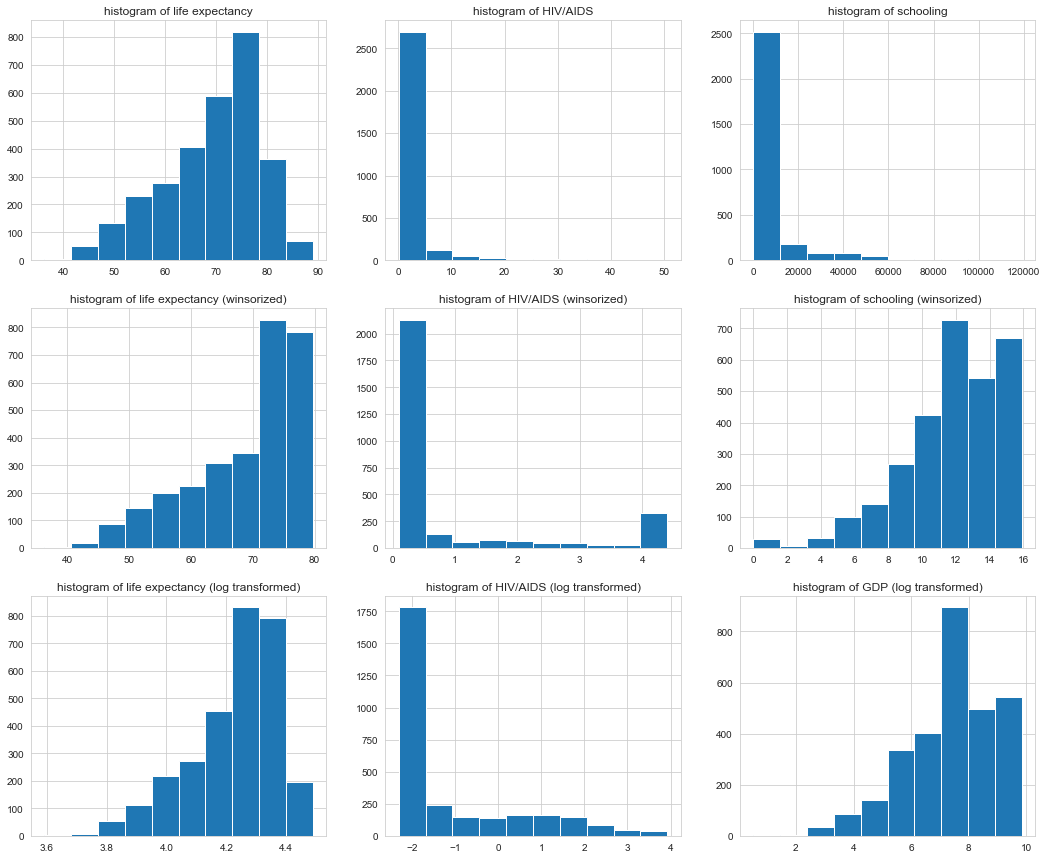

In [53]:
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(df["Life expectancy "])
plt.title("histogram of life expectancy")

plt.subplot(3, 3, 2)
plt.hist(df[" HIV/AIDS"])
plt.title("histogram of HIV/AIDS")

plt.subplot(3, 3, 3)
plt.hist(df["GDP"])
plt.title("histogram of schooling")

# histograms of the winsorized data
# winsorization is a simplified version of taking outliers in these data
plt.subplot(3, 3, 4)
plt.hist(df["winsorized_Life expectancy "])
plt.title("histogram of life expectancy (winsorized)")

plt.subplot(3, 3, 5)
plt.hist(df["winsorized_ HIV/AIDS "])
plt.title("histogram of HIV/AIDS (winsorized)")

plt.subplot(3, 3, 6)
plt.hist(df["winsorized_Schooling"])
plt.title("histogram of schooling (winsorized)")

# histograms of the log transformed data
# doing a histogram of the log transformated data might normalize
# but it doesn't seems like doing this makes the data look normalized
# i think it's okay the the data doesn't look normalized, I would expect to see some skew because of the nature of the dataset
plt.subplot(3, 3, 7)
plt.hist(np.log(df["Life expectancy "]))
plt.title("histogram of life expectancy (log transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(df[" HIV/AIDS"]))
plt.title("histogram of HIV/AIDS (log transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(df["winsorized_GDP"]))
plt.title("histogram of GDP (log transformed)")

plt.show()

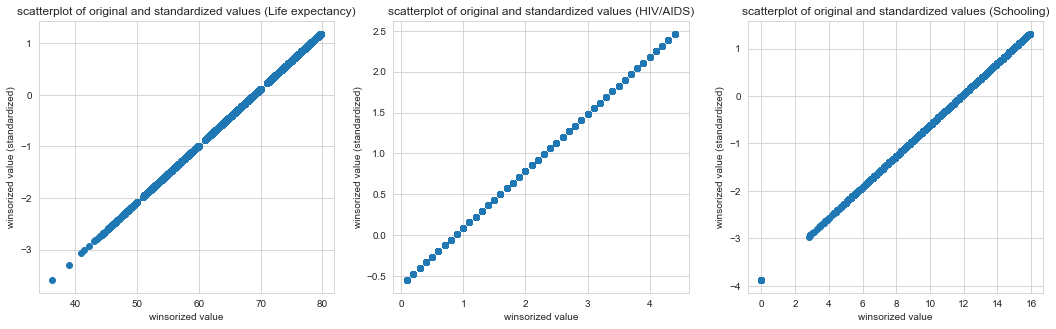

In [55]:
from sklearn.preprocessing import scale

df["scaled_winsorized_Life expectancy "] = scale(df["winsorized_Life expectancy "])
df["scaled_winsorized_ HIV/AIDS "] = scale(df["winsorized_ HIV/AIDS "])
df["scaled_winsorized_Schooling"] = scale(df["winsorized_Schooling"])

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

# draw the heatmap using seaborn.
plt.scatter(df["winsorized_Life expectancy "], df["scaled_winsorized_Life expectancy "])
plt.title("scatterplot of original and standardized values (Life expectancy)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (standardized)")
#plt.xlim(0.00000001)

plt.subplot(1,3,2)
# draw the heatmap using seaborn.
plt.scatter(df["winsorized_ HIV/AIDS "], df["scaled_winsorized_ HIV/AIDS "])
plt.title("scatterplot of original and standardized values (HIV/AIDS)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (standardized)")

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
plt.scatter(df["winsorized_Schooling"], df["scaled_winsorized_Schooling"])
plt.title("scatterplot of original and standardized values (Schooling)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (standardized)")

plt.show()

In [60]:
winsorized_Life_expectancy_mean = df["winsorized_Life expectancy "].mean() #life expectancy
winsorized_HIVAIDS_mean = df["winsorized_ HIV/AIDS "].mean() # HIV/AIDS
winsorized_Schooling_mean = df["winsorized_Schooling"].mean() #Schooling
print('The mean of winsorized Life Expectancy: %f' % winsorized_Life_expectancy_mean)
print('The mean of winsorized HIV/AIDS: %f' % winsorized_HIVAIDS_mean)
print('The mean of winsorized Schooling: %f' % winsorized_Schooling_mean)

#Clarification for the graph between scaled-winsorized vs winsorized values: 
#For life expectancy and schooling: We see that the mean is high which shows that most data points are above average
#For HIV/AIDS: the average is low, which shows that most data points are below the mean

The mean of winsorized Life Expectancy: 68.941082
The mean of winsorized HIV/AIDS: 0.878863
The mean of winsorized Schooling: 11.887270


Method:
For this challenge assignment, I looked at the life expectancy dataframe and wanted to study which variables are positively or negatively correlated with life expectancy. Based on a guesses, I randomly chose percentage expenditure, HIV/AIDs, Alcohol, GDP, Schooling, Income Composition of Resources, Thinness 1-19 years, Diphtheria, and Polio as variables which might have either be positively correlated with life expectancy. My hypothesis was that percentage expenditure, GDP, schooling, income composition of resources would be have a positive correlation with life expectancy, while we would observe negative correlation between the other variables (HIV/AIDS, Alcohol, Thinness(1-19 years), diptheria, and polio) and life expectancy. So I first plotted all these variables against life expectancy and found life expectancy has positive relationships with percentage expenditure, GDP, schooling, income composition of resources, while life expectancy has negative relationships with HIV/AIDS while other variables (alcohol, thinness (1-19 years), polio) have no visible relationships with life expectancy based on the scatter plots.

For the variables with visible positive and/or relationships with life expectancy, I took out the outliers from all of them and checked correlation with each of them and life expentancy with income composition of resources, schooling, HIV/AIDS having the highest correlation, 0.72, 0.78, and -0.62 , respectively. Looking at the correlation coefficient of the variables, I decided to only choose Schooling and HIV/AIDs as major contributing factors to life expectancy. That is, I excluded income composition of resources because it seems highly correlated with schooling (0.8).